# Car brand classification (Inference)

### *In this notebook only one URL (so that the reader can understand the code better) is infered and 5 most similar images are displayed*

In [1]:
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import normalize
import os, glob
import urllib
from urllib.request import urlopen

In [2]:
#loading the trained model
model=load_model('model_carbrand.h5')

In [3]:
# function to download the image from URL
def downloadImage(URL):
    with urllib.request.urlopen(URL) as url:
        save_path = os.getcwd() 
        completeName = os.path.join(save_path, 'temp\\temp\\temp.jpg')         
        with open( completeName, 'wb') as f:
            f.write(url.read())

    img_path =completeName
    img = image.load_img(img_path, target_size=(150, 150))
    #os.remove(img_path)
    x = image.img_to_array(img)
    return x


In [4]:
#donwloading image from URL and temporarily storing
image_from_url=downloadImage("https://source.unsplash.com/random/?car,bmw")

In [5]:
#loading the downloaded image
test_datagen = ImageDataGenerator(rescale=1. / 255)
url_gen = test_datagen.flow_from_directory('temp/',
                                           target_size=(150, 150),
                                           batch_size=1, shuffle=False,
                                           class_mode='categorical')

Found 1 images belonging to 1 classes.


In [6]:
#function to display loaded image
def load_image_from_url(file_name):
    _img = image.load_img(

        os.path.join(os.getcwd() + '\\temp\\',  file_name)
       , 
        target_size=(224, 224)

    )
    return _img

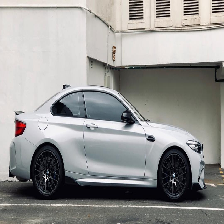

In [7]:
load_image_from_url(url_gen.filenames[0])

In [8]:
#predicting the matching probabilities
car_prediction = model.predict_generator(generator=url_gen, steps=1)
#car_prediction = model.predict_proba(sam)

np.set_printoptions(suppress=True)
car_prediction = car_prediction*100
car_prediction.reshape(-1)
np.set_printoptions(suppress=True)
print('car predictions: \n Audi:{}% \n Benz:{}% \n Bmw:{}%'.format(np.array2string(car_prediction[0][0]),
                                                                   np.array2string(car_prediction[0][1]),
                                                                   np.array2string(car_prediction[0][2])))

Instructions for updating:
Please use Model.predict, which supports generators.
car predictions: 
 Audi:0.00331214% 
 Benz:98.35723% 
 Bmw:1.6394575%


In [9]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
activation_15 (Activation)   (None, 148, 148, 32)      0         
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
dropout_12 (Dropout)         (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 72, 72, 32)        9248      
_________________________________________________________________
activation_16 (Activation)   (None, 72, 72, 32)        0         
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 36, 36, 32)       

### *obtaining the vectors after the flatten layer*

In [10]:
from tensorflow.keras.models import Model

# Generator forsimilarity work
sim_gen = test_datagen.flow_from_directory(
    'audi_benz_bmw_train/',
    target_size=(150, 150),
    batch_size=1, shuffle=False,
    class_mode='categorical')

layer_name = 'dense_6'
intermediate_layer_model = Model(inputs=model.input,
                                 outputs=model.get_layer(layer_name).output)

intermediate_output = intermediate_layer_model.predict_generator(generator=sim_gen, 
                                                                 steps=707)


Found 707 images belonging to 3 classes.


In [11]:
# function to find most similar images
def similar_images(find_similar):
    cos_dist = []
    for a,b in enumerate(intermediate_output):
        dist = cosine_similarity([find_similar],[b])
        cos_dist.append(dist)
    distance_arr = np.array(cos_dist).reshape(-1)
    similar_images =np.argsort(distance_arr)[::-1][:5]
    return similar_images

#function to load training images 
def load_trained_image(file_name):
    _img = image.load_img(

        os.path.join(os.getcwd() + '\\audi_benz_bmw_train\\',  file_name)
       , 
        target_size=(224, 224)

    )
    return _img


Similar  5 Cars from training data


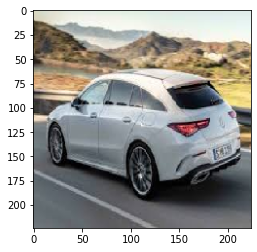

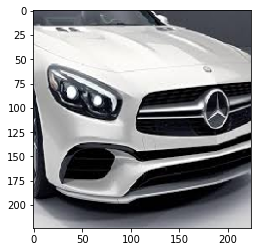

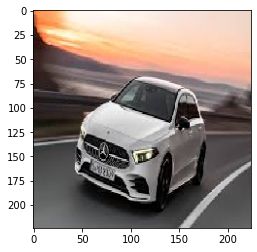

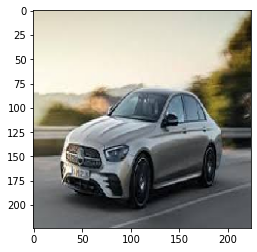

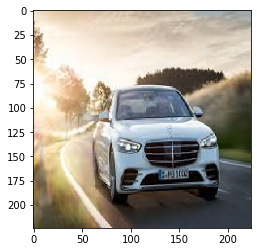

In [12]:
# obtaining the intermediate vector of the image from url
intermediate_output_url = intermediate_layer_model.predict_generator(generator=url_gen, 
                                                                 steps=1)
#finding similar image using function
similar_cars_url = similar_images(intermediate_output_url[0])

#displaying 5 most similar images
ims_1 = [load_trained_image(sim_gen.filenames[x]) for x in similar_cars_url]
print('Similar  5 Cars from training data')
for i in ims_1:
    plt.imshow(i)
    plt.show()